In [1]:
pwd

'C:\\Users\\duasp\\Machine Learning'

In [2]:
inpDir = '../input'

In [2]:
import sys
import os
import datetime
import numpy as np
import pandas as pd
from time import time
import seaborn as sns

import sklearn

import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Some Basic Directories for housekeeping
# set location of input files:
inpDir = os.path.join( '..', 'input')

outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

CMAP = plt.cm.rainbow
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('gplot')

TEST_SIZE = 0.25

<Figure size 640x480 with 0 Axes>

In [4]:
# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 75,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

'''plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))
'''
np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

In [6]:
data_df = pd.read_csv(os.path.join(inpDir,'StudentsPerformance.csv'))

In [7]:
data_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
data_df.describe()

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


In [11]:
for col in data_df.columns:
    print(col, data_df[col].unique(),'\n')

gender ['female' 'male'] 

race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E'] 

parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch ['standard' 'free/reduced'] 

test preparation course ['none' 'completed'] 

math score [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8] 

reading score [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40] 

writing score [ 74  88  93  4

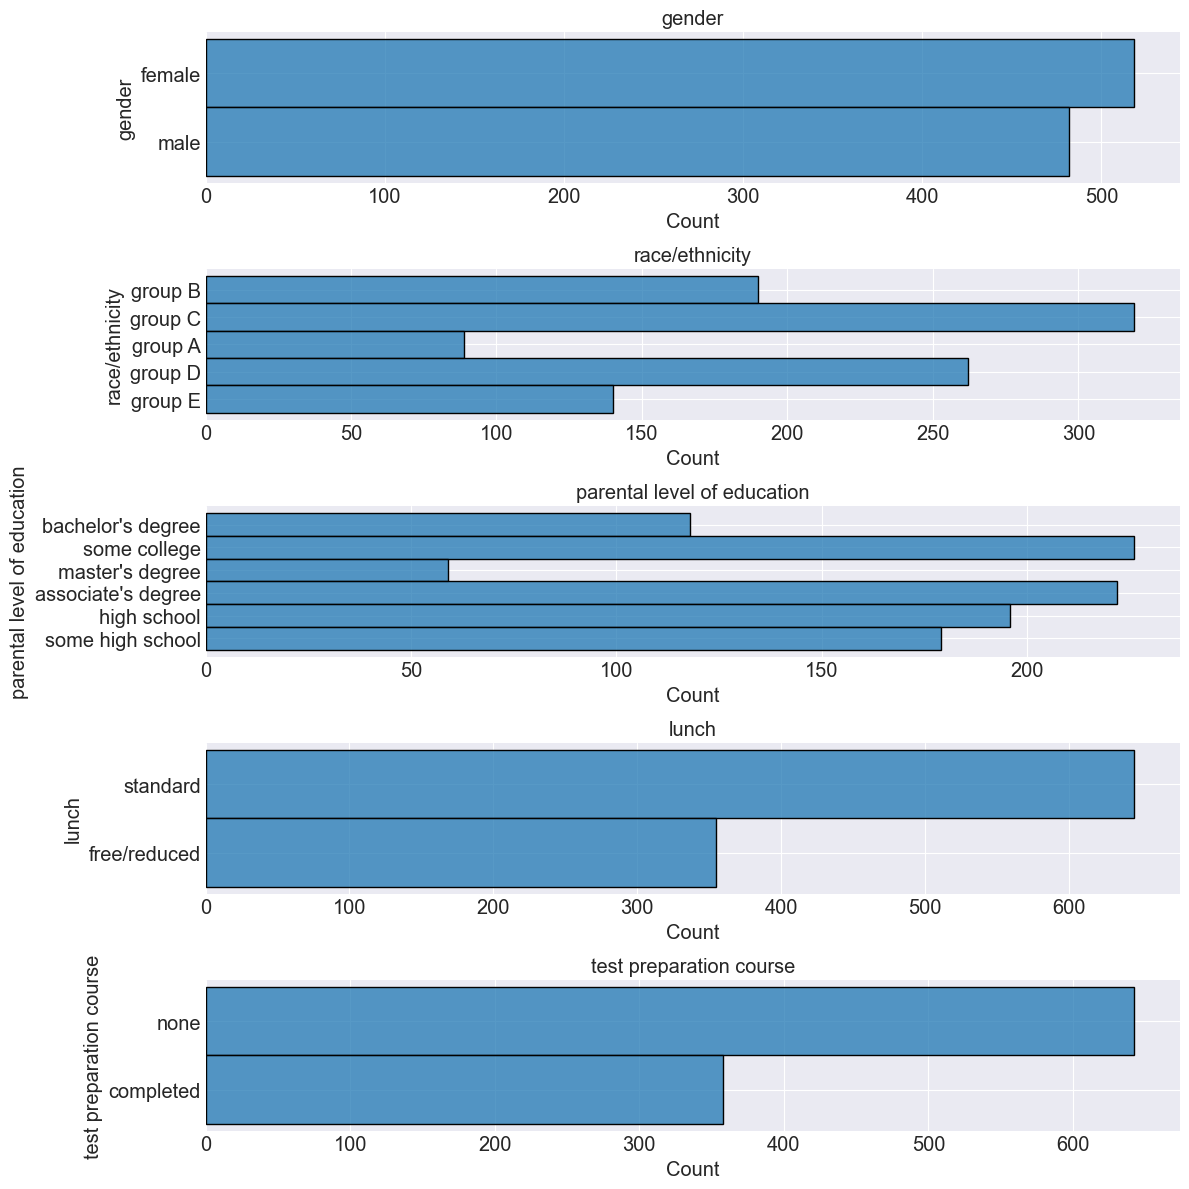

In [12]:
# List of all categorical columns
cat_cols = ['gender',
            'race/ethnicity',
            'parental level of education',
            'lunch',
            'test preparation course']

fig, axes = plt.subplots(5,1, figsize = (12,12))

for count, col in enumerate (cat_cols):  # loop through the columns
    
    ax = axes[count]                   # inst the fig & ax

    colCount = data_df[col].value_counts()    #get count of items
    
    ax.set_title(col)
    
    sns.histplot(data_df, y=col ,ax = ax)    # plot
    
plt.tight_layout()

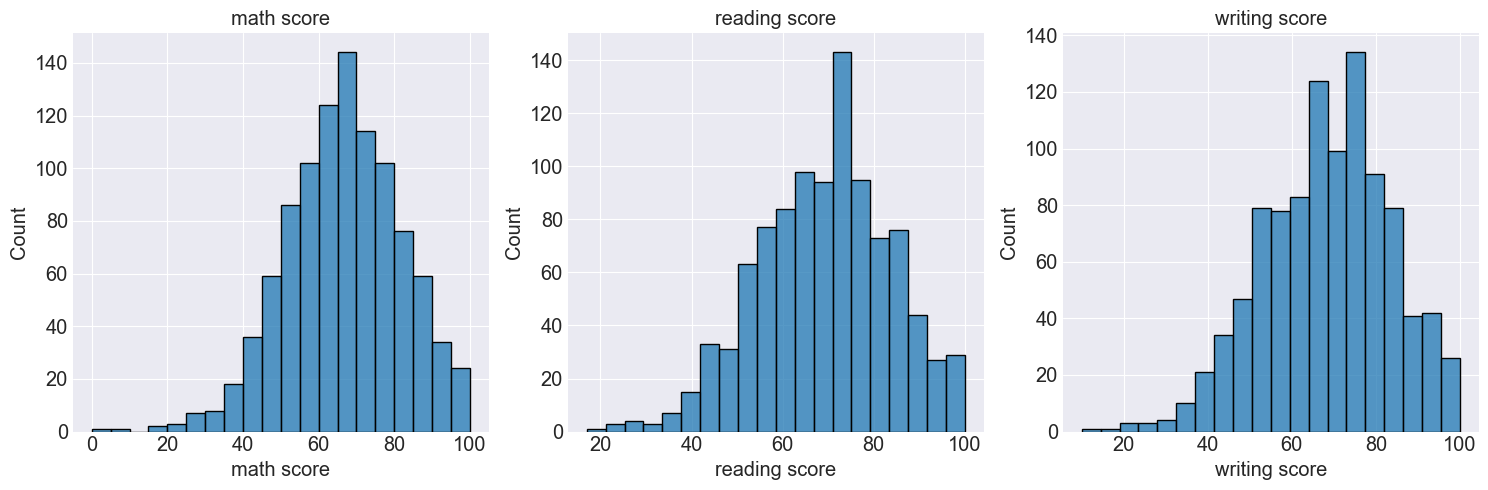

In [13]:
# List of all categorical columns
num_cols = ['math score','reading score','writing score']

fig, axes = plt.subplots(1,3, figsize = (15,5))

for count, col in enumerate (num_cols):  # loop through the columns
    
    ax = axes[count]                   # inst the fig & ax
    
    ax.set_title(col)
    
    sns.histplot(data_df, x = col ,ax = ax, bins = 20)    # plot
    
plt.tight_layout()

In [14]:
data_df[['gender','math score']].groupby(['gender'], as_index = False).mean()

,gender,math score
0,female,63.63
1,male,68.73


In [15]:
data_df[['gender','reading score']].groupby(['gender'], as_index = False).mean()

,gender,reading score
0,female,72.61
1,male,65.47


In [16]:
data_df[['gender','writing score']].groupby(['gender'], as_index = False).mean()

,gender,writing score
0,female,72.47
1,male,63.31


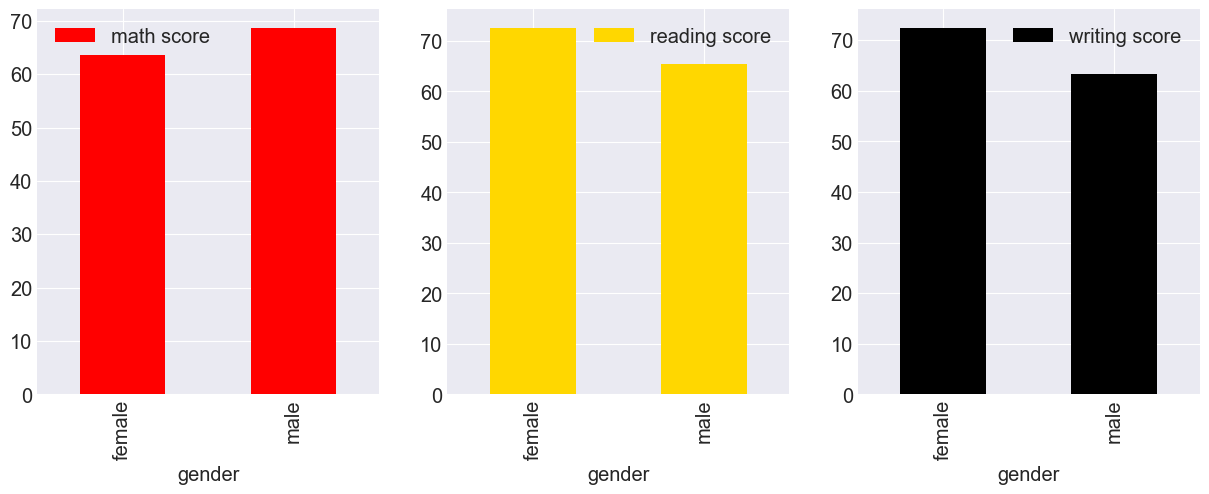

In [17]:
fig, axes = plt.subplots(1,3)

data_df[['gender','math score']].groupby(['gender']).mean().plot(kind = 'bar', ax = axes[0],color = 'red');

data_df[['gender','reading score']].groupby(['gender']).mean().plot(kind = 'bar', ax = axes[1],color = 'gold');

data_df[['gender','writing score']].groupby(['gender']).mean().plot(kind = 'bar', ax = axes[2],color = 'black');

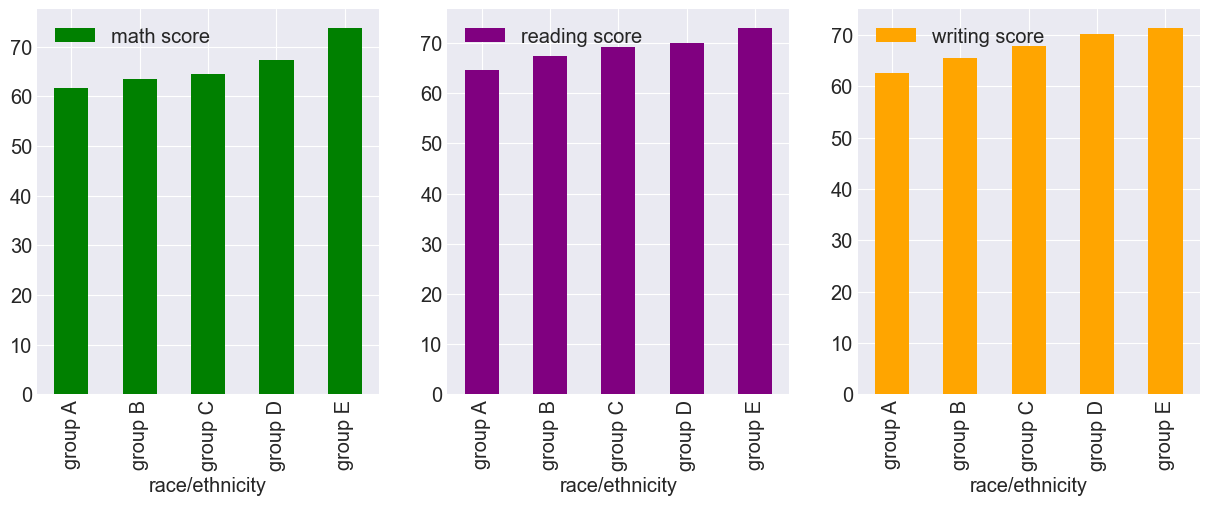

In [18]:
fig, axes = plt.subplots(1,3)

col = 'race/ethnicity'
data_df[[col,'math score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[0],color = 'green');

data_df[[col,'reading score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[1],color = 'purple');

data_df[[col,'writing score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[2],color = 'orange');

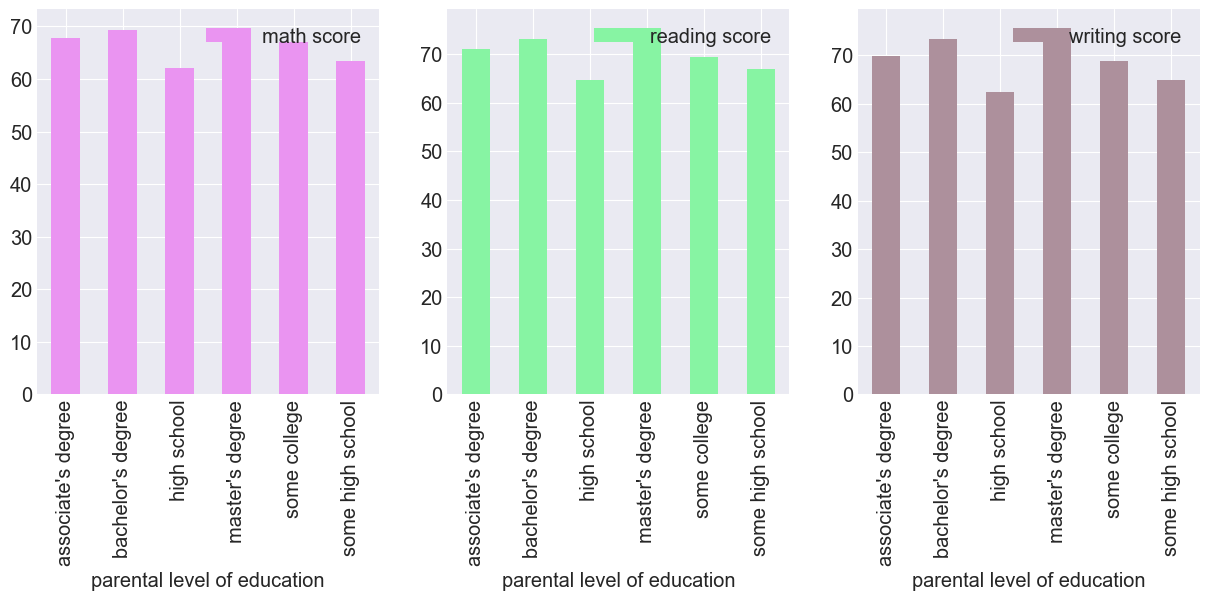

In [19]:
'parental level of education'
fig, axes = plt.subplots(1,3)

col = 'parental level of education'
data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[0],color = '#ea94f1');

data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[1],color = '#87f4a3');

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[2],color = '#ad909c');

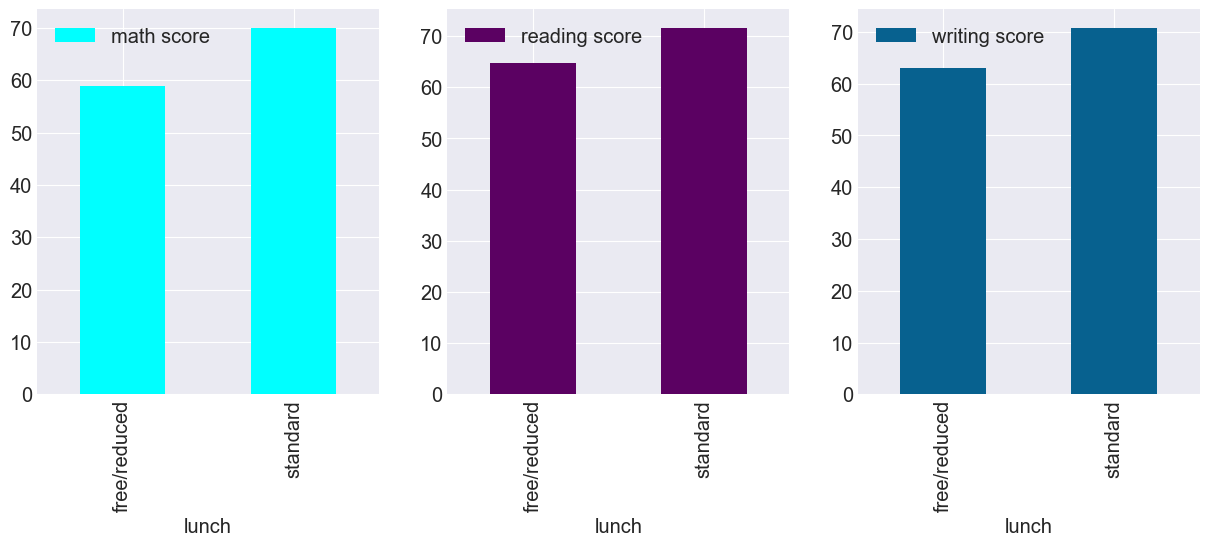

In [20]:
fig, axes = plt.subplots(1,3)

col = 'lunch'
data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[0],color = 'cyan');

data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[1],color = '#5b0162');

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[2],color = '#07618f');

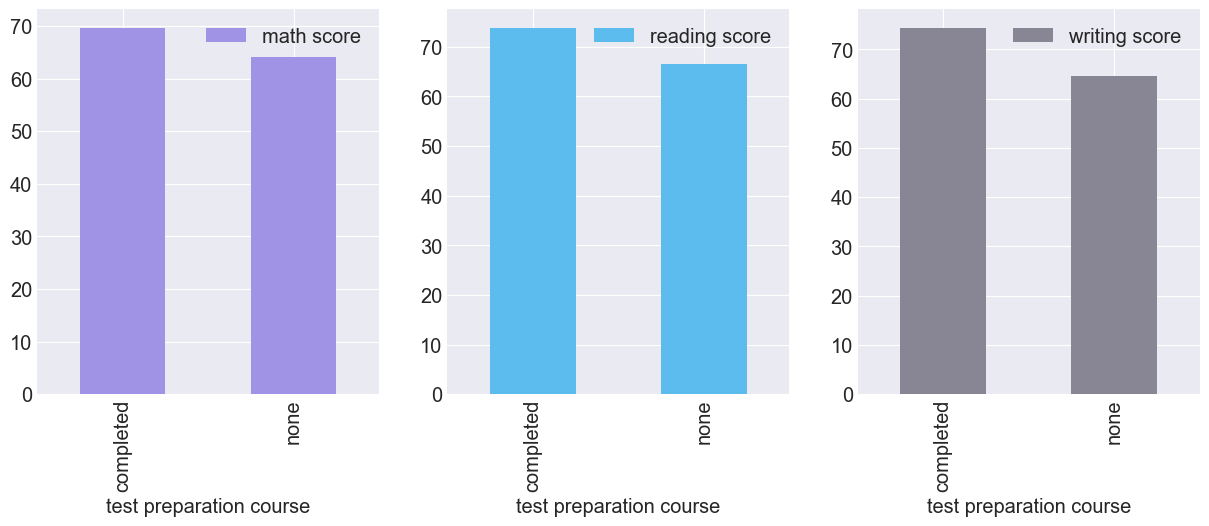

In [21]:
fig, axes = plt.subplots(1,3)

col = 'test preparation course'
data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[0],color = '#a092e5');

data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[1],color = '#5bbced');

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[2],color = '#888594');

<Axes: >

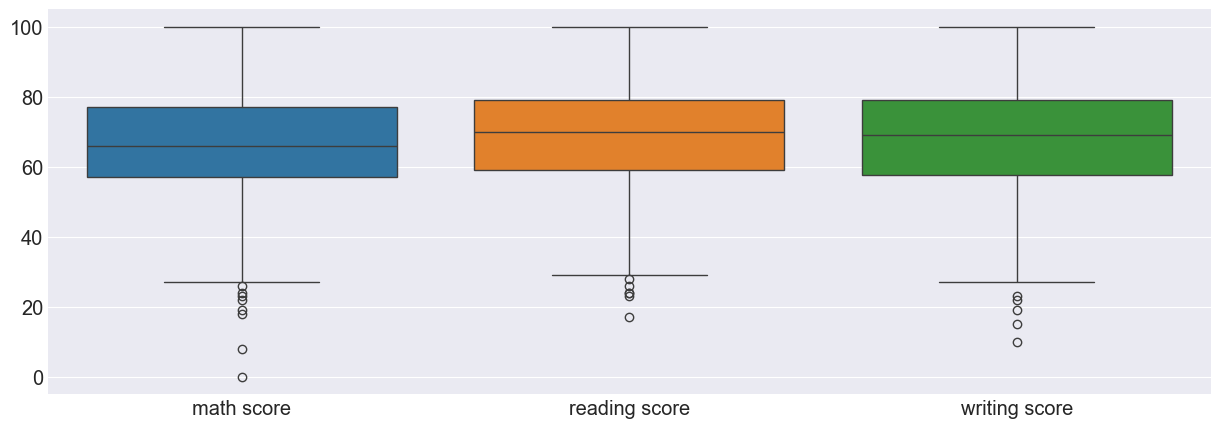

In [22]:
sns.boxplot(data_df)

<Axes: xlabel='math score'>

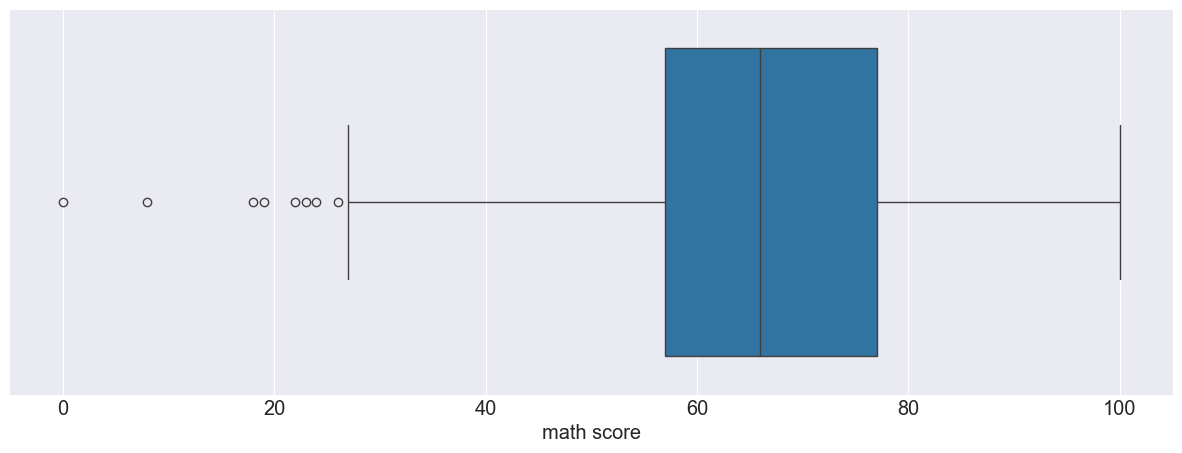

In [23]:
sns.boxplot(x = 'math score',data = data_df)

In [26]:
Q1 = np.percentile(data_df['math score'],25)
Q1

57.0

In [27]:
Q3 = np.percentile(data_df['math score'],75)
Q3

77.0

In [28]:
Q3 - Q1

20.0

In [32]:
outlier_distance = (Q3 - Q1) * 1.5
outlier_distance

30.0

In [33]:
outlier_list = [] 
outlier_list.extend(data_df[data_df['math score'] < Q1 - outlier_distance].index)
outlier_list

[17, 59, 145, 338, 466, 787, 842, 980]

In [34]:
Q1 = np.percentile(data_df['math score'],25)
Q3 = np.percentile(data_df['math score'],75)
outlier_list.extend(data_df[data_df['math score'] < Q1 - outlier_distance].index)
outlier_distance = (Q3 - Q1) * 1.5

<Axes: xlabel='reading score'>

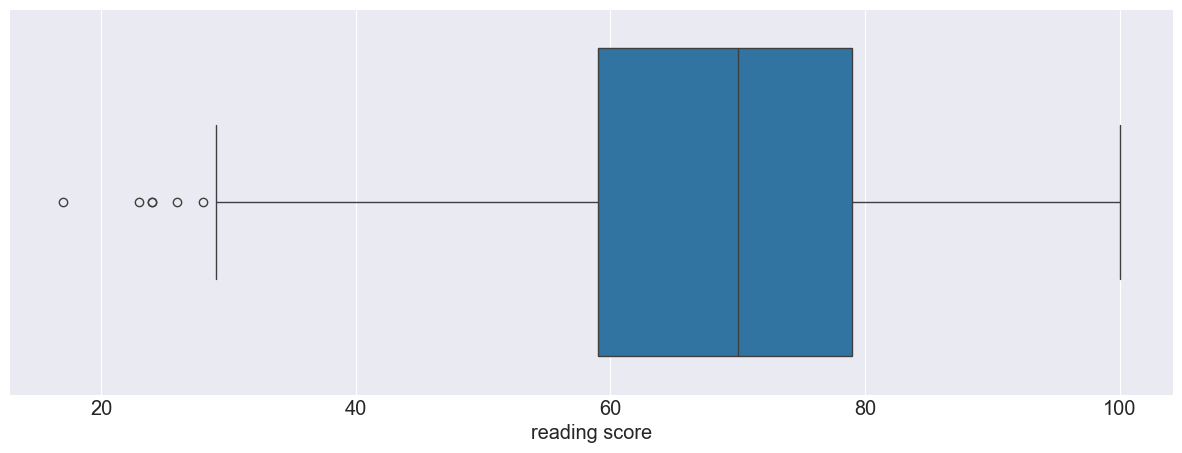

In [35]:
sns.boxplot(x = 'reading score',data = data_df)


In [36]:
Q1 = np.percentile(data_df['reading score'],25)
Q3 = np.percentile(data_df['reading score'],75)
outlier_list.extend(data_df[data_df['reading score'] < Q1 - outlier_distance].index)
outlier_distance = (Q3 - Q1) * 1.5

In [37]:
Q1 = np.percentile(data_df['writing score'],25)
Q3 = np.percentile(data_df['writing score'],75)
outlier_list.extend(data_df[data_df['writing score'] < Q1 - outlier_distance].index)
outlier_distance = (Q3 - Q1) * 1.5

<Axes: xlabel='writing score'>

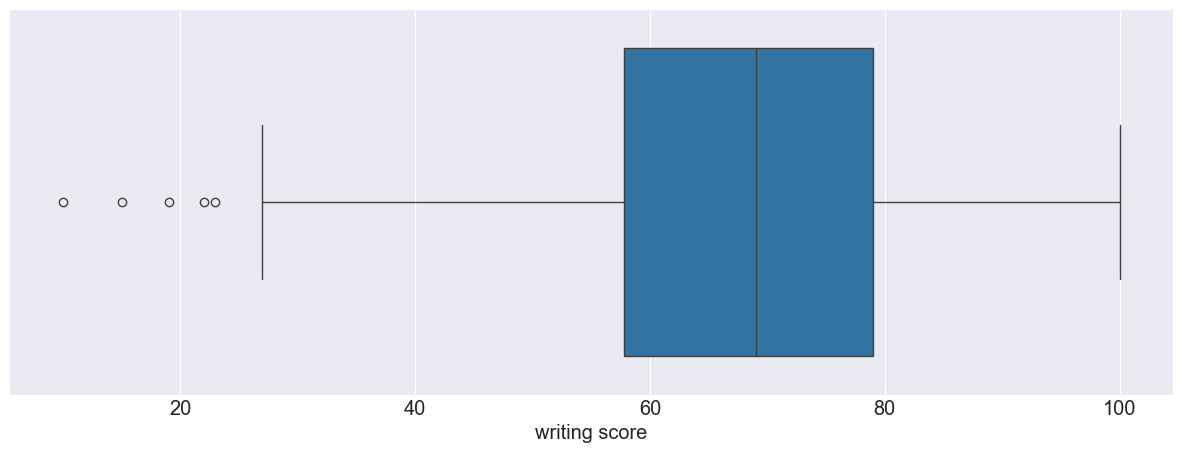

In [38]:
sns.boxplot(x = 'writing score',data = data_df)

In [39]:
from collections import Counter

In [40]:
outlier_count = Counter(outlier_list)
outlier_count

Counter({59: 4,
         980: 4,
         338: 3,
         17: 2,
         145: 2,
         466: 2,
         787: 2,
         842: 2,
         76: 2,
         211: 2,
         327: 2,
         596: 2,
         896: 1})

In [42]:
data_df['overall'] = (data_df['reading score'] + data_df['writing score'] + data_df['math score']) / 3
data_df.head()

,gender,race/ethnicity,parental level of education,lunch,...,math score,reading score,writing score,overall
0,female,group B,bachelor's degree,standard,...,72,72,74,72.67
1,female,group C,some college,standard,...,69,90,88,82.33
2,female,group B,master's degree,standard,...,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,...,47,57,44,49.33
4,male,group C,some college,standard,...,76,78,75,76.33


<Axes: xlabel='gender', ylabel='overall'>

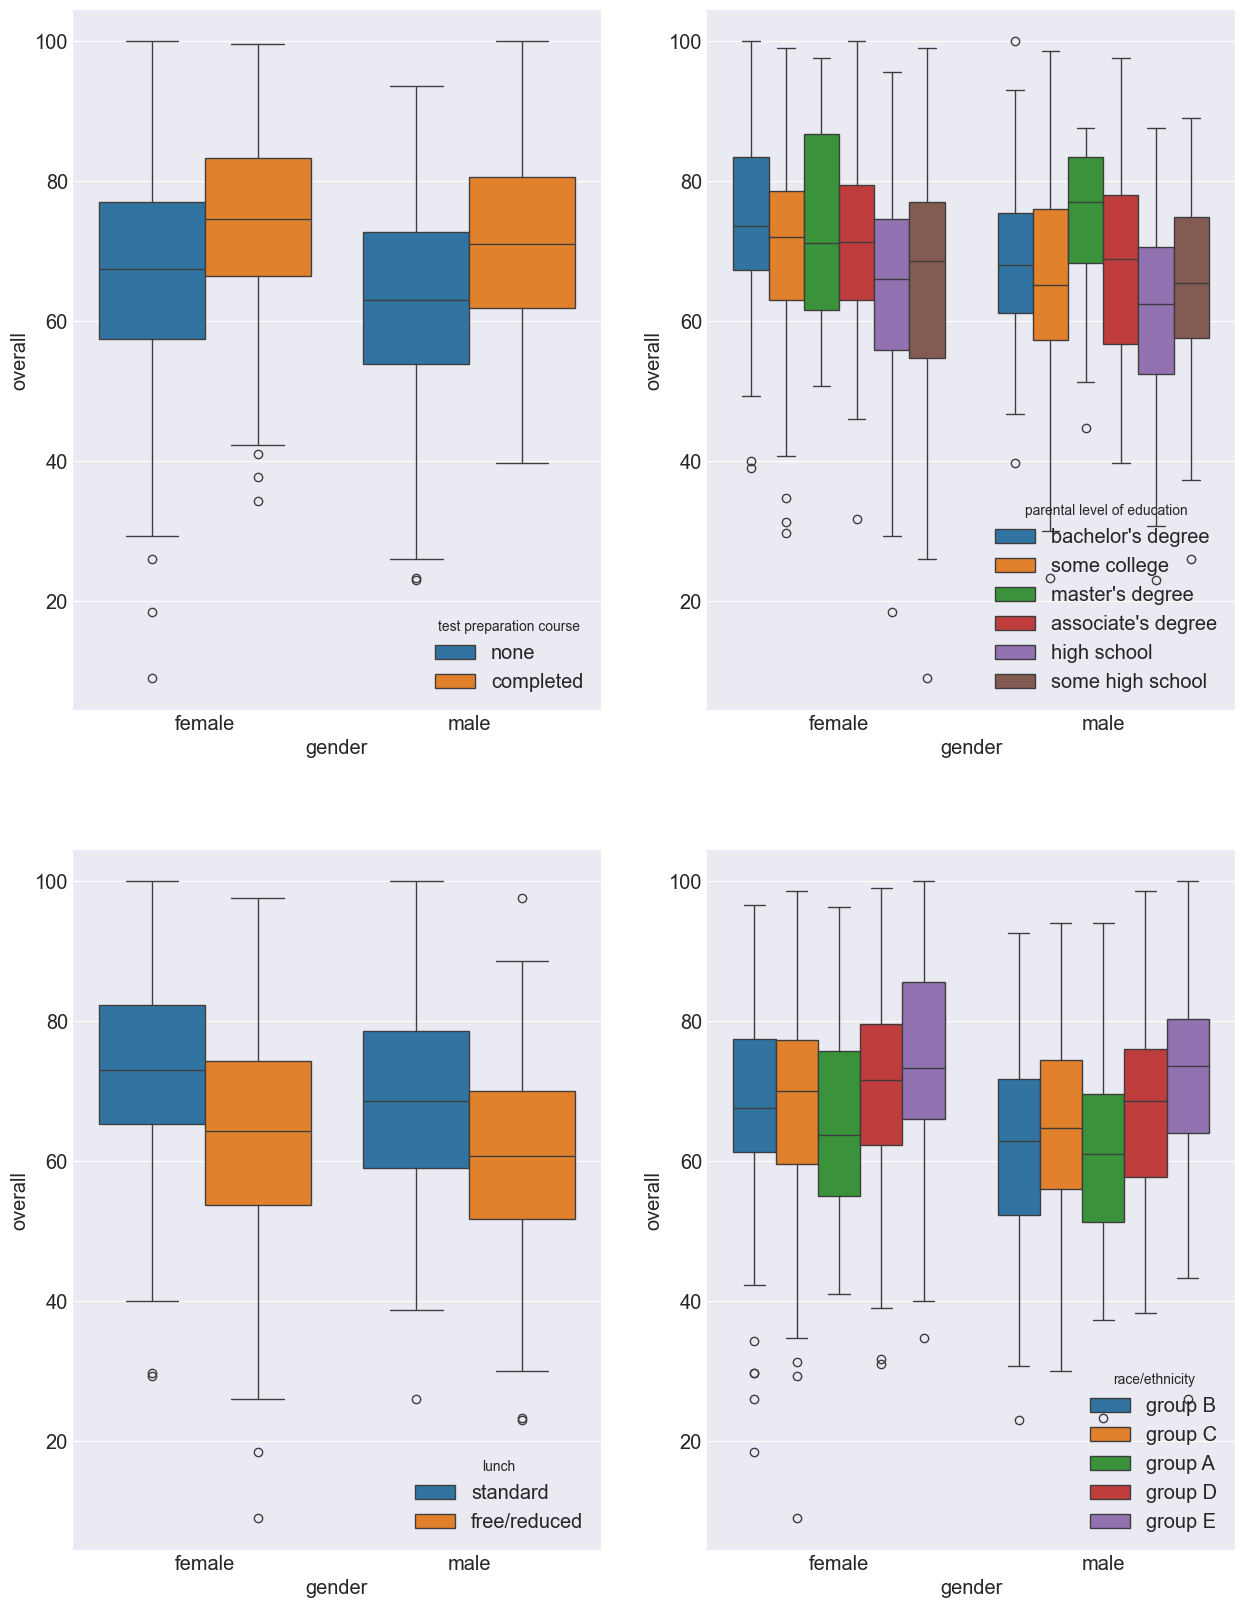

In [54]:
fig = plt.figure(figsize = (15,20))

ax = fig.add_subplot(2,2,1)

sns.boxplot(data = data_df, x = 'gender', y = 'overall', hue = 'test preparation course', ax = ax)

ax = fig.add_subplot(2,2,2)

sns.boxplot(data = data_df, x = 'gender', y = 'overall', hue = 'parental level of education', ax = ax)

ax = fig.add_subplot(2,2,3)

sns.boxplot(data = data_df, x = 'gender', y = 'overall', hue = 'lunch', ax = ax)

ax = fig.add_subplot(2,2,4)

sns.boxplot(data = data_df, x = 'gender', y = 'overall', hue = 'race/ethnicity', ax = ax)

<Axes: ylabel='count'>

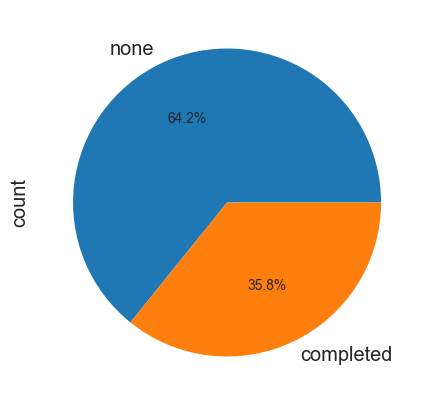

In [68]:
data_df[col].value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='count'>

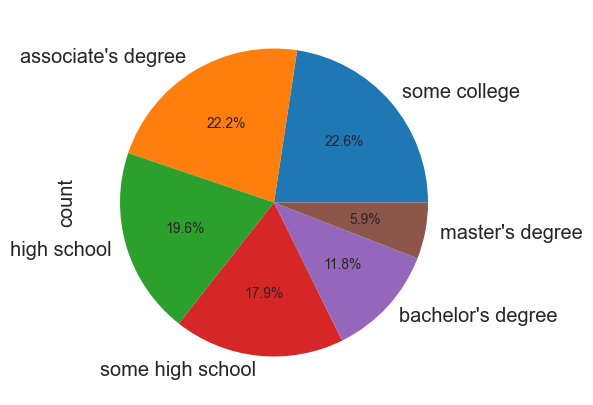

In [69]:
data_df['parental level of education'].value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='count'>

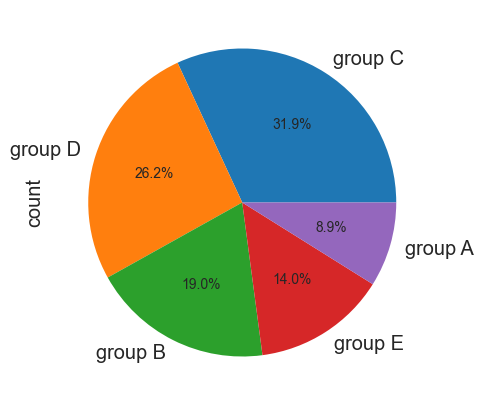

In [70]:
data_df['race/ethnicity'].value_counts().plot.pie(autopct = '%1.1f%%')

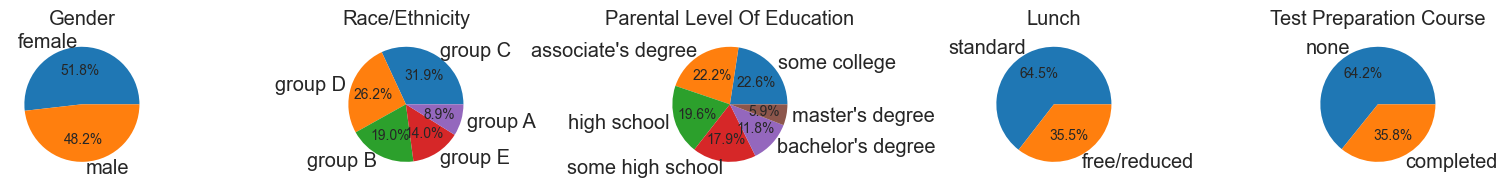

In [83]:
fig, axes = plt.subplots(1,5)

for count, col in enumerate(cat_cols):
    ax = axes[count]
    
    data_df[col].value_counts().plot.pie(autopct='%1.1f%%',ax = ax)
    
    ax.set_ylabel('')
    
    ax.set_title(col.title())
    
plt.tight_layout()

<Axes: xlabel='gender', ylabel='writing score'>

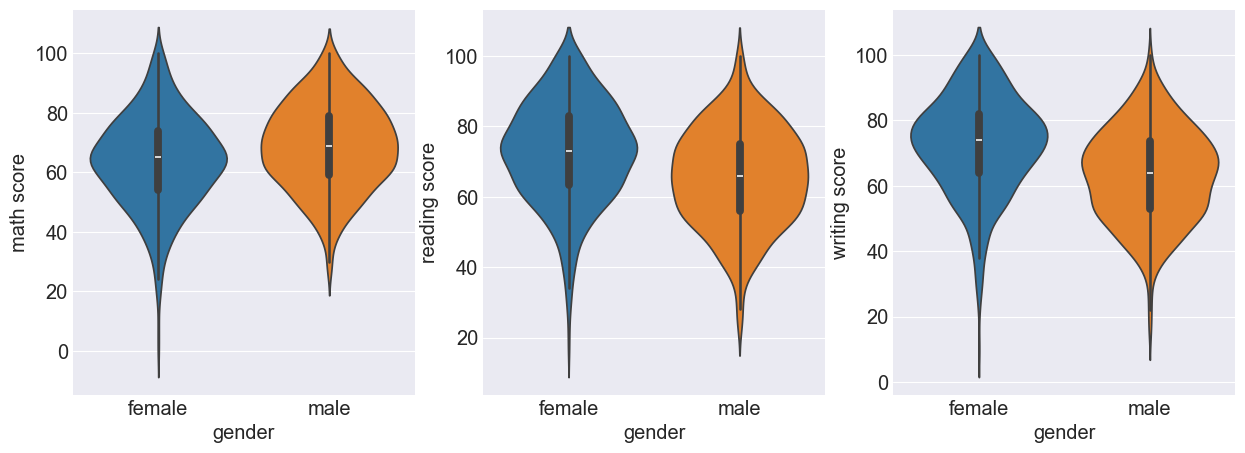

In [88]:
fig = plt.figure()

ax = fig.add_subplot(131)

sns.violinplot(data = data_df, x = 'gender', y = 'math score', hue = 'gender', ax = ax)

ax = fig.add_subplot(132)

sns.violinplot(data = data_df, x = 'gender', y = 'reading score', hue = 'gender', ax = ax)

ax = fig.add_subplot(133)

sns.violinplot(data = data_df, x = 'gender', y = 'writing score', hue = 'gender', ax = ax)

<Axes: >

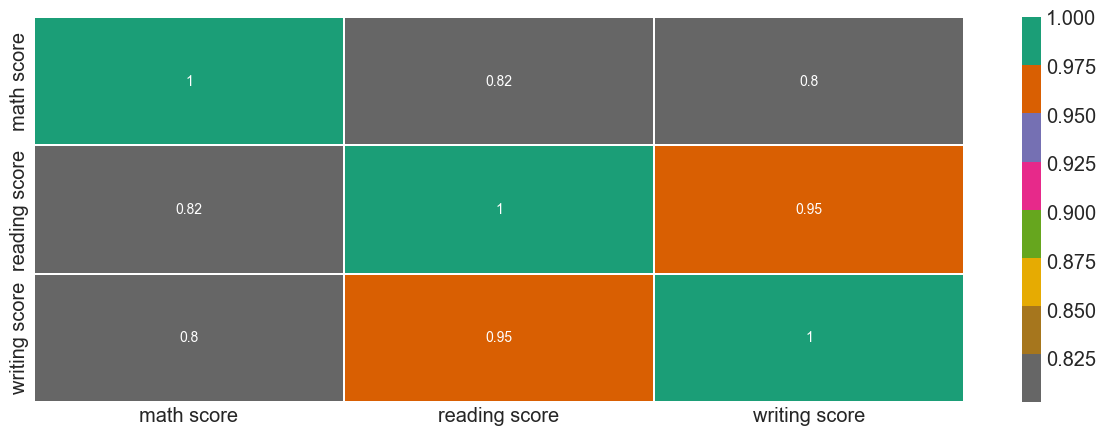

In [91]:
sns.heatmap(data_df[num_cols].corr(), annot = True, cmap = 'Dark2_r', linewidths=.2)